##  3- Análisis gráfico global  y algunas estadísticas

Se mostrarán las funciones que dispone NILMTK para realizar un diagnóstico rápido del dataset. Así también se disponen de algunas funciones para obtener datos estadísticos basados en el uso y consumo de energía de los elementos.

Como siempre, en primer lugar cargamos librerías y relizamos otros ajustes:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet, TimeFrame
import warnings
from IPython.display import SVG

warnings. filterwarnings("ignore")
plt.style.use('bmh')



Cargamos ahora el dataset y asociamos las etiquetas para los gráficos

In [2]:
#dataset de referencia 
deps = DataSet('dsual.h5')



elec=deps.buildings[1].elec # Todos los medidores

print (elec)
labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fan', 'Freezer', 'Television','Vacuum cleaner', 'boiler']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x] 
    
print(Meters)


#etiquetas eje x en algunos graficos
days = ['2022-02-02 10:16:00+01:00',  '2021-02-02 12:58:00+01:00' ]

colors_1 = ['tab:red','tab:brown','tab:gray','tab:pink','tab:blue','tab:orange','tab:green']
colors_2 = [colors_1[0]]+colors_1[4:]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
)
{ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[]): 'Main', ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)]): 'Fan', ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)]): 'Freezer', ElecMeter(instance=4, building=1, dataset='DSUAL', applianc

Ahora vamos a realizar los graficos con  todos los datos de potencia

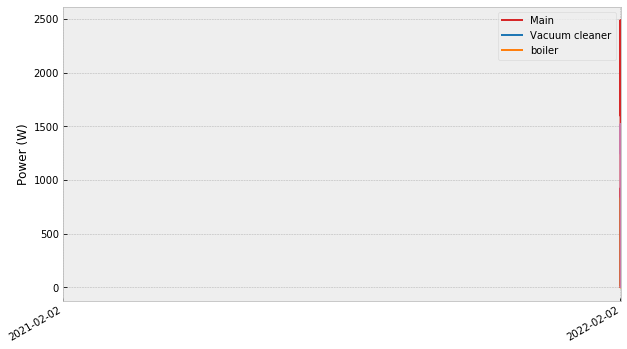

In [3]:
rcParams['figure.figsize'] = (10, 6)

tf1=TimeFrame(start='2022-02-01', end='2022-02-03')
ax=elec.select(instance=[1,2,3,4,5,6]).plot(timeframe=tf1)
#colores
c=0
for col in colors_2:    
    ax.get_lines()[c].set_color(col)
    c+=1    
#etiquetas
ax.legend([list(Meters.values())[0]]+list(Meters.values())[4:10])
ax.set(xticks=days[:5])
#guarda gráfico
plt.savefig('./data/images/2.5_Plot_all_meters_week1.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

Relación entre la señal agregada y la suma de las mediciones individuales de los dispositivos mediante una gráfica de área:

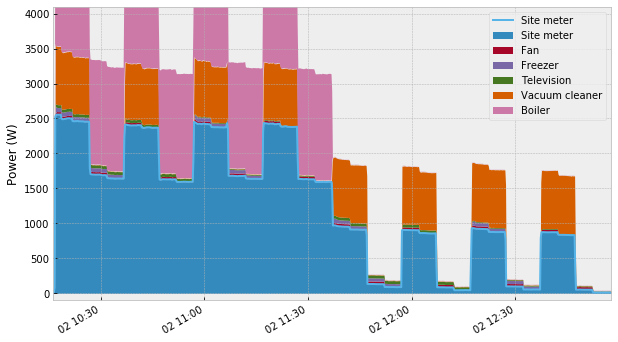

In [4]:

from nilmtk import TimeFrame
t=TimeFrame(start='2022-02-02 10:16:00+01:00', end='2022-02-02 12:58:00+01:00')
elec.select(instance=[1,2,3,4,5,6]).plot(kind='area',timeframe=t)
ax=elec[1].plot(timeframe=t)

ax.set(ylim=(-100,4100))
pass


In [5]:
colors_2[:6]

['tab:red', 'tab:blue', 'tab:orange', 'tab:green']

Un gráfico similar de la relación entre la señal agregada y la suma de las mediciones individuales de los dispositivos mediante una gráfica de área::

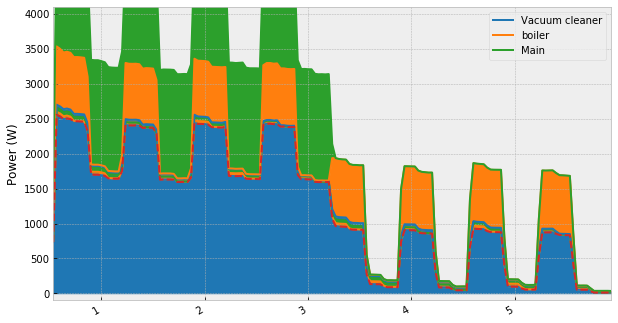

In [6]:
rcParams['figure.figsize'] = (10, 6)

t0 = '2022-02-02 10:16:00+01:00'
t1 = '2022-02-02 12:58:00+01:00'

df_1 = elec.select(instance=[1,2,3,4,5,6]).dataframe_of_meters(ac_type='active', sample_period=60)[t0:t1]
df_2 = elec[1].power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

ax1 = df_1.plot(kind='area', color=colors_2[1:])
df_2.plot(ax=ax1, color=colors_1[0], ls='--')

 
#etiquetas
ax1.legend(list(Meters.values())[4:10]+[list(Meters.values())[0]])
ax1.set_xticklabels(['1','2','3','4','5','6','7','8'])
ax1.set(ylim=(-100,4100))
ax1.set(ylabel='Power (W)')
#guarda gráfico
plt.savefig('./data/images/2.7_Plot_all_meters_03march.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

In [7]:
elec.select(instance=[1,2,3,4,5,6]).power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

Loading data for meter ElecMeterID(instance=6, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


2022-02-02 10:16:00+01:00    1495.627930
2022-02-02 10:17:00+01:00    5054.710449
2022-02-02 10:18:00+01:00    5005.232422
2022-02-02 10:19:00+01:00    4926.898438
2022-02-02 10:20:00+01:00    4943.894531
                                ...     
2022-02-02 12:53:00+01:00      37.224449
2022-02-02 12:54:00+01:00      37.299286
2022-02-02 12:55:00+01:00      37.833092
2022-02-02 12:56:00+01:00      37.594604
2022-02-02 12:57:00+01:00      37.590164
Freq: 60S, Name: (power, active), Length: 162, dtype: float32

### Perfil de Voltaje

In [8]:
V2=next(elec[2].load())['voltage']
V3=next(elec[3].load())['voltage']
V4=next(elec[4].load())['voltage']
V5=next(elec[5].load())['voltage']
V6=next(elec[6].load())['voltage']




In [9]:
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'Fan':    [round(V2.mean(),1), round(V2.mean(),1), round(V2.mean(),1)], #Voltaje fan
     'Freezer':    [round(V3.max(),1),  round(V3.max(),1),  round(V3.max(),1)],  #Voltaje frezer
     'Television':    [round(V4.min(),1),  round(V4.min(),1),  round(V4.min(),1)],  #Voltaje tv
     'Vacuum cleaner':    [round(V5.min(),1),  round(V5.min(),1),  round(V5.min(),1)],  #Voltaje freezer
     'Light':    [round(V6.min(),1),  round(V6.min(),1),  round(V6.min(),1)]}  #Voltaje freezer



pd.DataFrame(d)

,Indicador,Fan,Freezer,Television,Vacuum cleaner,Light
0,Promedio,239.699997,233.399994,235.100006,235.100006,222.5
1,Máximo,239.699997,233.399994,235.100006,235.100006,222.5
2,Mínimo,239.699997,233.399994,235.100006,235.100006,222.5


## Gráfico del perfil de voltaje

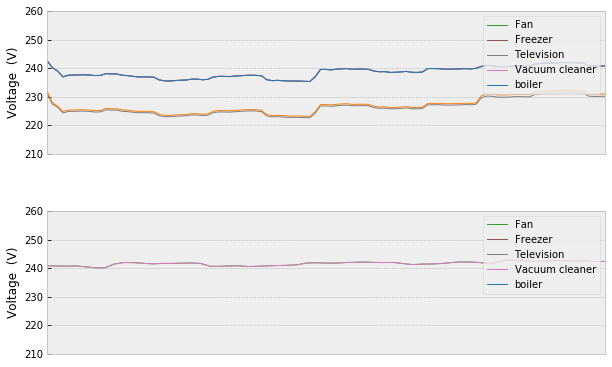

In [16]:
rcParams['figure.figsize'] = (10, 7)

#redimensina el gráfico para reducir tamaño
V1=next(elec[1].load(sample_period=60))['voltage']
V2=next(elec[2].load(sample_period=60))['voltage']
V3=next(elec[3].load(sample_period=60))['voltage']
V4=next(elec[4].load(sample_period=60))['voltage']
V5=next(elec[5].load(sample_period=60))['voltage']
V6=next(elec[6].load(sample_period=60))['voltage']



fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'hspace': 0.4})

ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:00:00+01:00'

V1[ta:tb].plot(ax=ax1, c='tab:green', lw=1)
V2[ta:tb].plot(ax=ax1, c='tab:brown', lw=1)
V3[ta:tb].plot(ax=ax1, c='tab:gray', lw=1)
V4[ta:tb].plot(ax=ax1, c='tab:pink', lw=1)
V5[ta:tb].plot(ax=ax1, c='tab:blue', lw=1)
V6[ta:tb].plot(ax=ax1, c='tab:orange', lw=1)
#V7[ta:tb].plot(ax=ax1, c='tab:green', lw=1)


tc = '2022-02-02 12:00:00+01:00'
td = '2022-02-02 12:58:00+01:00'

V1[tc:td].plot(ax=ax2, c='tab:green', lw=1)
V2[td:td].plot(ax=ax2, c='tab:brown', lw=1)
V3[td:td].plot(ax=ax2, c='tab:gray', lw=1)
V4[tc:td].plot(ax=ax2, c='tab:pink', lw=1)
V5[td:td].plot(ax=ax2, c='tab:blue', lw=1)
V6[td:td].plot(ax=ax2, c='tab:orange', lw=1)
#V7[td:td].plot(ax=ax2, c='tab:green', lw=1)



ax1.legend(list(Meters.values())[1:8], loc='upper right')
ax2.legend(list(Meters.values())[1:8], loc='upper right')

ax1.set(ylim=(210,260))
ax2.set(ylim=(210,260))

ax1.set(ylabel='Voltage  (V)')
ax2.set(ylabel='Voltage  (V)')


ax1.set(xticks=days[1:])
ax2.set(xticks=days[2:])


#guarda gráfico
plt.savefig('./data/images/2.8_voltage_profile.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Datos faltantes

Los datos faltantes, huecos o gaps están determinados por los metadatos de cada tipo de medidor, específicamente en el ajuste del parámetro max_sample_period. Este valor indica el tiempo máximo que se tolera entre mediciones sin que se considere que el medidor está apagado

In [11]:
elec[1].good_sections(full_results=True).combined() #secciones buenas Main_RST

[TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)]

Visualizar de manera gráfica los datos faltantes 

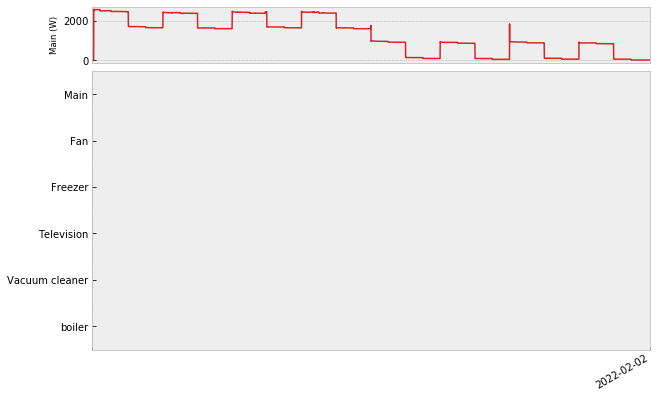

In [12]:
rcParams['figure.figsize'] = (10, 7)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios':[1,5]})

elec[1].power_series_all_data().plot(ax=ax1, c='tab:red', lw=1.5)
ax1.set_ylabel('Main (W)', fontsize=8.5)
ax1.minorticks_off()

elec.plot_good_sections(ax=ax2)
ax2.set_yticklabels(reversed(list(Meters.values())))
ax2.grid(axis='y')
ax2.set(xticks=days)
l=['2022-02-02']
ax2.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/2.9_good_sections.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Tasa de abandono y tiempo de funcionamiento

#### Tasa de abandono
Sin contar cuando el sistema no registra datos superando el tiempo máximo de muestreo, aunque también se perciben perdidas de datos debido al propio sistema de adquisición, lo cual se le llama abandono o dropout. 

La tasa de abandono (dropout rate) es por tanto  un número entre 0 y 1 que especifica la proporción de muestras faltantes. Una tasa de abandono de 0 significa que no faltan muestras y un valor de 1 significaría que faltan todas las muestras (100%). 

#### Tiempo de funcionamiento
El tiempo de funcionamiento calculado estará condicionado al parámetro max_sample_period de cada medidor especificado en los metadatos. Si no se han registrado datos pasado  ese tiempo, se considera el medidor como apagado.

In [13]:
a=[]; b=[]; c=[]
for meter, name in Meters.items():
    a.append(name)
    b.append(str(meter.uptime())) #tiempo de funcionamiento
    c.append(round(meter.dropout_rate()*100,1)) #tasa de abandono

a.append('Total')
b.append(str(elec.uptime()))
c.append(round(elec.dropout_rate()*100,1))
    
df=pd.DataFrame(data=[b,c], columns=a, index=['Uptime','Dropout Rate']).transpose()
df

Calculating dropout_rate for ElecMeterID(instance=6, building=1, dataset='DSUAL') ...   

,Uptime,Dropout Rate
Main,0 days 02:41:43,0
Fan,0 days 02:41:43,0
Freezer,0 days 02:41:43,0
Television,0 days 02:41:43,0
Vacuum cleaner,0 days 02:41:43,0
boiler,0 days 02:41:43,0
Total,0 days 02:41:43,0


### Registro de actividad

Periodos de tiempo en que se registra una medición superior a un umbral definido (incluyendo peaks).

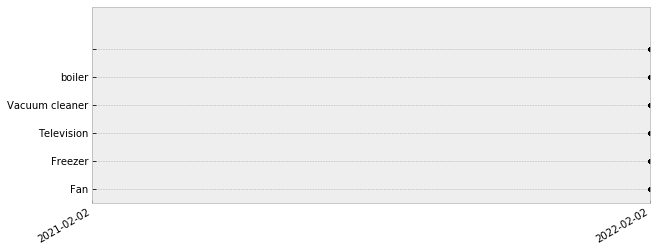

In [14]:
rcParams['figure.figsize'] = (10, 4)

Devices=elec.select(instance=[1,2,3,4,5,6]) #MeterGroup de dispositivos
ax=Devices.plot_when_on(on_power_threshold=10) #umbral de 80 W

#etiquetas
ax.set_yticklabels(list(Meters.values())[1:10])
ax.set(xticks=days)

#guarda gráfico
plt.savefig('./data/images/2.10_On_power1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('./data/images/2.10_On_power1.png', bbox_inches='tight', transparent=True, dpi=1200)
#formatos savefig: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz, evitar guardar .svg por el tamaño del archivo (50Mb)
plt.show()
pass


### Graficos de Actividad por dispositivo y por día

IndexError: list index out of range

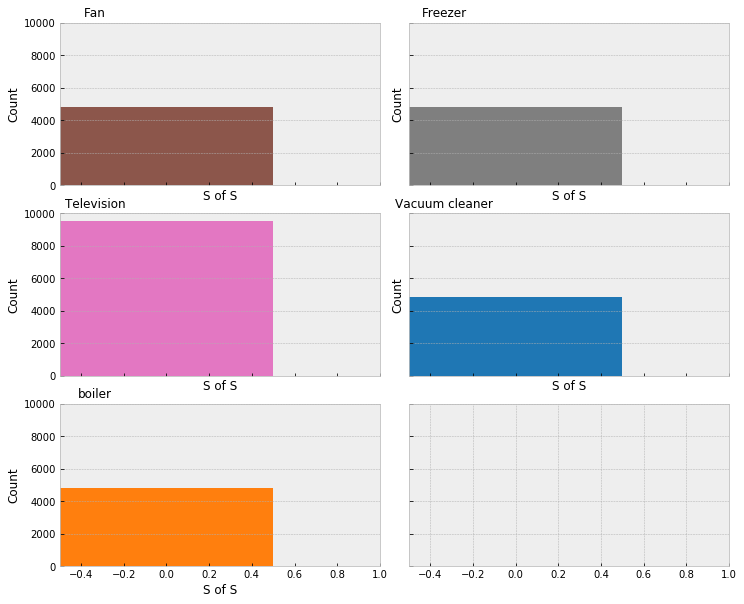

In [22]:
rcParams['figure.figsize'] = (12, 10)
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True,
                                                       gridspec_kw={'hspace': 0.17, 'wspace': 0.09})
m=1
for ax in fig.get_axes(): 
    list(Meters)[m].plot_activity_histogram(ax=ax, period='S', #periodo en segundos
                                            bin_duration='S', #duración en segundos
                                            on_power_threshold=10, #umbral de 10w
                                            plot_kwargs={'color':colors_1[m]})
    #labels
    ttl=ax.set_title(labels['Meters'][m], fontsize=12)
    ttl.set_position([.11, 1])
    m=m+1
    ax.grid(axis='x')

ax1.set(ylim=[0,9])
ax1.set(yticks=[0,1,2,3,4,5,6,7,8,9])
ax1.set(xticks=list(range(0,24)))
#labels
ax1.set(xlabel='')
ax2.set(xlabel='',ylabel='')
ax3.set(xlabel='')
ax4.set(xlabel='',ylabel='')
ax6.set(ylabel='')

#guarda gráfico
plt.savefig('./data/images/2.12_Activity_histogram.svg',bbox_inches='tight', transparent=True)
plt.show()
pass

### Mapa de calor con las mediciones de potencia activa del medidor Main 

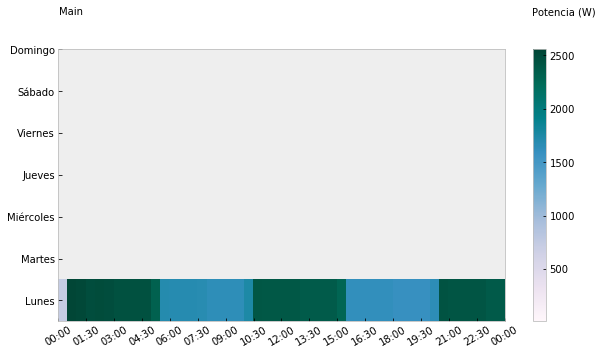

In [23]:
import numpy as np
import pandas as pd

d=elec[1].power_series_all_data(sample_period=60, resample_kwargs={'how': 'mean'}).to_frame()

d.fillna(0,inplace=True)
d.columns=['active']
d['weekday']=d.index.weekday
d['time']=d.index.time
matrix=d.groupby(['weekday','time']).active.mean().unstack().values
plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.pcolor(matrix,cmap='PuBuGn')
plt.xlim([0,48])
ax.set_xticks(np.arange(0,49,3))
ax.set_xticklabels(['00:00','01:30','03:00','04:30','06:00',
                    '07:30','09:00','10:30','12:00','13:30',
                    '15:00','16:30','18:00','19:30','21:00',
                    '22:30','00:00'],rotation=30)
ax.set_yticks(np.arange(0.5,7))
ax.set_yticklabels(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.colorbar()
ax.text(0.1, 7.4, 'Main', ha='left', va='center')
ax.text(51, 7.4, 'Potencia (W)', ha='left', va='center') 

plt.savefig('./data/images/2.13_Use_power1.svg', bbox_inches='tight', transparent=True)
plt.show()

### Estadísticas de energía

Cálculo de la energía total, es decir , las potencias activa, reactiva y aparente.

In [24]:
elec[1].total_energy()

reactive     0.066641
active       3.363644
apparent    25.962220
dtype: float64

Cálculo de la energía (potencia activa) por medidores

In [25]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

6/6 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

,kWh Día,kWh Sem.,Total kWh
Main,29.95,209.66,3.36
Fan,0.57,4.00,0.06
Freezer,0.61,4.28,0.07
Television,0.63,4.39,0.07
Vacuum cleaner,9.81,68.67,1.10
boiler,17.82,124.73,2.00
